# Data and Model Preparation

## Prepare Data

In [0]:
!mkdir data

SPLIT_TYPE = 'rand' # @param ['rand', 'qtoken']
DATA_URL = r'https://s3.amazonaws.com/commensenseqa/'
DATA_TRAIN_URL = DATA_URL+'train_'+SPLIT_TYPE+'_split.jsonl'
DATA_VALID_URL = DATA_URL+'dev_'+SPLIT_TYPE+'_split.jsonl'
DATA_TEST_URL = DATA_URL+'test_'+SPLIT_TYPE+'_split_no_answers.jsonl'

!wget $DATA_TRAIN_URL -O data/train.jsonl
!wget $DATA_VALID_URL -O data/dev.jsonl
!wget $DATA_TEST_URL -O data/test.jsonl

--2019-03-17 15:43:49--  https://s3.amazonaws.com/commensenseqa/train_rand_split.jsonl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.9.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.9.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3513912 (3.4M) [binary/octet-stream]
Saving to: ‘data/train.jsonl’

data/train.jsonl    100%[===================>]   3.35M  5.76MB/s    in 0.6s    

2019-03-17 15:43:55 (5.76 MB/s) - ‘data/train.jsonl’ saved [3513912/3513912]

--2019-03-17 15:43:56--  https://s3.amazonaws.com/commensenseqa/dev_rand_split.jsonl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.9.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.9.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 438003 (428K) [binary/octet-stream]
Saving to: ‘data/dev.jsonl’

data/dev.jsonl      100%[===================>] 427.74K  1.27MB/s    in 0.3s    

2019-03-17 15:43:57 (1.27 MB/s) - ‘data/dev.jsonl’ saved [438

## Prepare BERT

In [0]:
import sys

!test -d bert_model || git clone https://github.com/google-research/bert bert_model

if not 'bert_model' in sys.path:
  sys.path += ['bert_model']

Cloning into 'bert_model'...
remote: Enumerating objects: 317, done.
remote: Total 317 (delta 0), reused 0 (delta 0), pack-reused 317
Receiving objects: 100% (317/317), 254.91 KiB | 900.00 KiB/s, done.
Resolving deltas: 100% (178/178), done.


## Prepare Embedding

In [0]:
!mkdir embed

GLOVE_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/glove_sm.txt'

!wget $GLOVE_URL -O embed/glove_sm.txt

--2019-03-17 15:44:06--  https://s3.eu-west-2.amazonaws.com/csqa-embed/glove_sm.txt
Resolving s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)... 52.95.148.8
Connecting to s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)|52.95.148.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44697629 (43M) [text/plain]
Saving to: ‘embed/glove_sm.txt’

embed/glove_sm.txt  100%[===================>]  42.63M  36.0MB/s    in 1.2s    

2019-03-17 15:44:08 (36.0 MB/s) - ‘embed/glove_sm.txt’ saved [44697629/44697629]



## Prepare Weights

In [0]:
!mkdir ckpt

SEMB_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/semb-0.1788.h5'
ELMO_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/elmo-0.3333.h5'
BERT_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/bert-0.5340.h5'
COMB_ALL_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/comb-ALL-0.5736.h5'
COMB_AVG_BERT_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/comb.AVG-BERT-0.5558.h5'
COMB_AVG_ELMO_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/comb.AVG-ELMo-0.3406.h5'
COMB_ELMO_BERT_URL = r'https://s3.eu-west-2.amazonaws.com/csqa-embed/comb.ELMo-BERT-0.5736.h5'

!wget $SEMB_URL -O ckpt/semb-0.1788.h5
!wget $ELMO_URL -O ckpt/elmo-0.3333.h5
!wget $BERT_URL -O ckpt/bert-0.5340.h5
!wget $COMB_ALL_URL -O ckpt/comb-ALL-0.5736.h5
!wget $COMB_AVG_BERT_URL -O ckpt/comb.AVG-BERT-0.5558.h5
!wget $COMB_AVG_ELMO_URL -O ckpt/comb.AVG-ELMo-0.3406.h5
!wget $COMB_ELMO_BERT_URL -O ckpt/comb.ELMo-BERT-0.5736.h5

--2019-03-17 15:44:11--  https://s3.eu-west-2.amazonaws.com/csqa-embed/semb-0.1788.h5
Resolving s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)... 52.95.150.72
Connecting to s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)|52.95.150.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15536288 (15M) [application/x-www-form-urlencoded]
Saving to: ‘ckpt/semb-0.1788.h5’

ckpt/semb-0.1788.h5 100%[===================>]  14.82M  48.7MB/s    in 0.3s    

2019-03-17 15:44:12 (48.7 MB/s) - ‘ckpt/semb-0.1788.h5’ saved [15536288/15536288]

--2019-03-17 15:44:13--  https://s3.eu-west-2.amazonaws.com/csqa-embed/elmo-0.3333.h5
Resolving s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)... 52.95.150.72
Connecting to s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)|52.95.150.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1075024 (1.0M) [binary/octet-stream]
Saving to: ‘ckpt/elmo-0.3333.h5’

ckpt/elmo-0.3333.h5 100%[=====

# Define Model

## Imports

In [0]:
import gc
import os
import csv
import json
import collections

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorboardcolab as tbc
import matplotlib.pyplot as plt

from keras import utils
from keras import layers
from keras import models
from keras import backend as K
from keras import callbacks as cbs
from keras import optimizers as opt
from keras import initializers as ini
from keras import preprocessing as pre

import tokenization as tkz
import run_classifier as rcf

W0317 15:45:11.962466 140700776265600 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14
Using TensorFlow backend.


## Data Processing

### Data Example Structure

In [0]:
class CsQAExample(object):
  
  def __init__(self, uid, Q, A, label):
    self.uid = uid
    self.Q = Q
    self.A = A
    self.label = label
    assert isinstance(A, (list, tuple)), 'A must be an instance of list or tuple'
    assert len(A) == 5, 'length of A should be 3, but got {}'.format(len(A))
    
  def __str__(self):
    return self.__repr__()
  
  def __repr__(self):
    l = [
        'uid: {}'.format(self.uid),
        'Q: {}'.format(self.Q),
        'A0: {}'.format(self.A[0]),
        'A1: {}'.format(self.A[1]),
        'A2: {}'.format(self.A[2]),
        'A3: {}'.format(self.A[3]),
        'A4: {}'.format(self.A[4]),
        'label: {}'.format(self.label)
    ]
    return '; '.join(l)

### Data Processor

In [0]:
class CsQAProcessor(object):
  
  def get_train_examples(self, data_dir):
    return self._create_examples(self._read_lines(os.path.join(data_dir, 'train.jsonl')))

  def get_dev_examples(self, data_dir):
    return self._create_examples(self._read_lines(os.path.join(data_dir, 'dev.jsonl')))

  def get_test_examples(self, data_dir):
    return self._create_examples(self._read_lines(os.path.join(data_dir, 'test.jsonl')))

  def get_labels(self):
    return [0, 1, 2, 3, 4]
    
  def _read_lines(self, path):
    return open(path).read().split('\n')[:-1]
    
  def _create_examples(self, lines):
    ans_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
    examples = []
    for line in lines:
      d = json.loads(line)
      uid = d['id']
      Q = d['question']['stem']
      A = [
          d['question']['choices'][0]['text'],
          d['question']['choices'][1]['text'],
          d['question']['choices'][2]['text'],
          d['question']['choices'][3]['text'],
          d['question']['choices'][4]['text']
      ]
      label = ans_dict.get(d.get('answerKey'), -1)
      examples.append(CsQAExample(uid, Q, A, label))
    return examples

### Define Tokenizer

In [0]:
class SimpleTokenizer(object):
  
  def __init__(self, data_dir, include_set=['train', 'dev', 'test'], do_lower_case=True):
    processor = CsQAProcessor()
    data = []
    if 'train' in include_set:
      data.extend(processor.get_train_examples(data_dir))
    if 'dev' in include_set:
      data.extend(processor.get_dev_examples(data_dir))
    if 'test' in include_set:
      data.extend(processor.get_test_examples(data_dir))
    tokens = set()
    self.bstk = tkz.BasicTokenizer(do_lower_case)
    for example in data:
      Q = example.Q
      tokens.update(self.bstk.tokenize(Q))
      for A in example.A:
        tokens.update(self.bstk.tokenize(A))
    self.vocab = collections.OrderedDict()
    self.vocab['[PAD]'] = 0
    self.vocab['[UNK]'] = 1
    self.vocab['[CLS]'] = 2
    self.vocab['[SEP]'] = 3
    index = 4
    for token in sorted(list(tokens)):
      self.vocab[token] = index
    self.inv_vocab = {v: k for k, v in self.vocab.items()}
  
  def tokenize(self, text):
    return self.bstk.tokenize(text)
  
  def convert_tokens_to_ids(self, tokens):
    return tkz.convert_by_vocab(self.vocab, tokens)
  
  def convert_ids_to_tokens(self, ids):
    return tkz.convert_by_vocab(self.inv_vocab, ids)

## Custom Layers

### SEmb Layer

In [0]:
class SEmbLayer(layers.Layer):
  
  def __init__(self, data_dir, embed_path, trainable=True, **kwargs):
    self.output_dim = 300
    self.data_dir = data_dir
    self.embed_path = embed_path
    self.trainable = trainable
    super(SEmbLayer, self).__init__(**kwargs)
    
  def build(self, input_shape):
    tokenizer = SimpleTokenizer(self.data_dir)
    embed_df = pd.read_table(self.embed_path, sep=' ', header=None, index_col=0, quoting=csv.QUOTE_NONE)
    word_embed = embed_df.loc[tokenizer.vocab.keys(), :].values
    nan_mask = np.isnan(word_embed)
    word_embed[nan_mask] = np.random.normal(scale=0.02, size=np.count_nonzero(nan_mask))
    word_embed[tokenizer.convert_tokens_to_ids(['[PAD]'])] = 0.
    word_embed = utils.normalize(word_embed)
    voc_size, emb_dim = word_embed.shape
    assert emb_dim == self.output_dim
    self.embed = self.add_weight(
        name='embeddings',
        shape=(voc_size, emb_dim),
        initializer=ini.Constant(word_embed),
        trainable=self.trainable
    )
    super(SEmbLayer, self).build(input_shape)
  
  def call(self, x):
    _, seq = K.int_shape(x)
    mask = K.tf.count_nonzero(x, axis=-1, keepdims=True, dtype=K.tf.float32)
    flat_x = K.reshape(x, (-1,))
    flat_x_emb = K.gather(self.embed, flat_x)
    x_seq = K.reshape(flat_x_emb, (-1, seq, self.output_dim))
    feature = K.sum(x_seq, axis=1) / mask
    return feature
  
  def compute_output_shape(self, input_shape):
    return input_shape[0], self.output_dim

### ELMo Layer

In [0]:
class ELMoLayer(layers.Layer):
  
  def __init__(self, trainable=True, **kwargs):
    self.output_dim = 1024
    self.trainable = trainable
    super(ELMoLayer, self).__init__(**kwargs)
  
  def build(self, input_shape):
    self.elmo = hub.Module(
        spec='https://tfhub.dev/google/elmo/2',
        trainable=self.trainable,
        name='elmo_module'
    )
    self.trainable_weights += K.tf.trainable_variables(scope='elmo_module/.*')
    super(ELMoLayer, self).build(input_shape)
  
  def call(self, x):
    return self.elmo(
        inputs=K.squeeze(K.cast(x, tf.string), axis=1),
        signature='default',
        as_dict=True
    )['default']
  
  def compute_output_shape(self, input_shape):
    return input_shape[0], self.output_dim

### BERT Layer

In [0]:
class BERTLayer(layers.Layer):
  
  def __init__(self, trainable=True, **kwargs):
    self.output_dim = 768
    self.trainable = trainable
    super(BERTLayer, self).__init__(**kwargs)
  
  def build(self, input_shape):
    self.bert = hub.Module(
        spec='https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1',
        trainable=self.trainable,
        name='bert_module'
    )
    self.trainable_weights += K.tf.trainable_variables(scope='bert_module/bert/.*')
    self.non_trainable_weights += K.tf.trainable_variables(scope='bert_module/cls/.*')
    super(BERTLayer, self).build(input_shape)
    
  def call(self, x):
    input_ids, input_mask, segment_ids = K.tf.unstack(K.tf.transpose(x, perm=[1, 0, 2]))
    bert_inputs = dict(
        input_ids=input_ids,
        input_mask=input_mask,
        segment_ids=segment_ids
    )
    return self.bert(
        inputs=bert_inputs,
        signature='tokens',
        as_dict=True
    )['pooled_output']
  
  def compute_output_shape(self, input_shape):
    return input_shape[0], self.output_dim

## Feature Extraction

### SEmb Feature Extraction Function

( FLAG: Flag ) -> lambda

In [0]:
def get_semb_feature(FLAG):
  semb = SEmbLayer(data_dir=FLAG.data_dir, embed_path=FLAG.embed_path, name='semb_layer')
  return lambda x: semb(x)

### ELMo Feature Extraction Function

( drop_rate: float ) -> lambda

In [0]:
def get_elmo_feature():
  elmo = ELMoLayer(name='elmo_layer')
  out = layers.Dense(256, activation='tanh', name='elmo_dense') # 256
  return lambda x: out(elmo(x))

### BERT Feature Extraction Function

( ) -> lambda

In [0]:
def get_bert_feature():
  bert = BERTLayer(name='bert_layer')
  return lambda x: bert(x)

## Output Function

( drop_rate: float, name: str ) -> lambda

In [0]:
def get_output_layer(drop_rate=0.1, name=None):
  drop = layers.Dropout(drop_rate, name='{}_output_dropout'.format(name))
  out = layers.Dense(1, name='{}_output_dense'.format(name))
  return lambda x: out(drop(x))

## Define Models

( FLAG: Flag ) -> tuple

In [0]:
def build_model(FLAG):
  
  # semb input interface
  semb_inputs = [layers.Input(
      shape=(4*FLAG.max_seq_length,),
      dtype='int32',
      name='semb_input_{}'.format(n)
  ) for n in range(FLAG.n_choices)]
  # elmo input interface
  elmo_inputs = [layers.Input(
      shape=(1,),
      dtype='string',
      name='elmo_input_{}'.format(n)
  ) for n in range(FLAG.n_choices)]
  # bert input interface
  bert_inputs = [layers.Input(
      shape=(3, FLAG.max_seq_length),
      dtype='int32',
      name='bert_input_{}'.format(n)
  ) for n in range(FLAG.n_choices)]
  
  # feature extraction layers
  semb = get_semb_feature(FLAG) # [B, 300]
  elmo = get_elmo_feature() # [B, 256]
  bert = get_bert_feature() # [B, 768]
  
  # semb model
  semb_out = get_output_layer(drop_rate=FLAG.semb_output_dropout, name='semb')
  semb_vec = [semb_out(semb(x)) for x in semb_inputs]
  semb_res = layers.Concatenate(name='semb_choice_concat')(semb_vec)
  semb_pred = layers.Softmax(name='semb_pred')(semb_res)
  semb_model = models.Model(inputs=semb_inputs, outputs=semb_pred, name='semb_model')
  
  # elmo model
  elmo_out = get_output_layer(drop_rate=FLAG.elmo_output_dropout, name='elmo')
  elmo_vec = [elmo_out(elmo(x)) for x in elmo_inputs]
  elmo_res = layers.Concatenate(name='elmo_choice_concat')(elmo_vec)
  elmo_pred = layers.Softmax(name='elmo_pred')(elmo_res)
  elmo_model = models.Model(inputs=elmo_inputs, outputs=elmo_pred, name='elmo_model')
  
  # bert model
  bert_out = get_output_layer(drop_rate=FLAG.bert_output_dropout, name='bert')
  bert_vec = [bert_out(bert(x)) for x in bert_inputs]
  bert_res = layers.Concatenate(name='bert_choice_concat')(bert_vec)
  bert_pred = layers.Softmax(name='bert_pred')(bert_res)
  bert_model = models.Model(inputs=bert_inputs, outputs=bert_pred, name='bert_model')
  
  # hybrid model
  comb_out = get_output_layer(drop_rate=FLAG.comb_output_dropout, name='comb')
  comb_vec = []
  for i in range(FLAG.n_choices):
    comb_prt = []
    if FLAG.exclude != 'SEmb':
      comb_prt.append(semb(semb_inputs[i]))
    if FLAG.exclude != 'ELMo':
      comb_prt.append(elmo(elmo_inputs[i]))
    if FLAG.exclude != 'BERT':
      comb_prt.append(bert(bert_inputs[i]))
    combined = layers.Concatenate(name='comb_feature_concat_{}'.format(i))(comb_prt) # Concatenate
    comb_vec.append(comb_out(combined))
  comb_res = layers.Concatenate(name='comb_choice_concat')(comb_vec)
  comb_pred = layers.Softmax(name='comb_pred')(comb_res)
  comb_model = models.Model(inputs=semb_inputs+elmo_inputs+bert_inputs, outputs=comb_pred, name='comb_model')
  
  return semb_model, elmo_model, bert_model, comb_model

## Data Loader

( FLAG: Flag ) -> dict

In [0]:
def load_data(FLAG):
  # load BERT tokenization info
  bert_module = hub.Module('https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1')
  token_info = bert_module(signature='tokenization_info', as_dict=True)
  with tf.Session():
    vocab_file = token_info['vocab_file'].eval()
    do_lower_case = token_info['do_lower_case'].eval()
  
  ftkz = tkz.FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)
  stkz = SimpleTokenizer(FLAG.data_dir, do_lower_case=do_lower_case)
  
  processor = CsQAProcessor()
  
  # target
  # semb (5, N, S), int32
  # elmo (5, N, 1), string
  # bert (5, N, 3, S), int32
  # label (N, 5), float32
  
  def to_features(examples):
    semb_features = [] # (N, 5, S)
    elmo_features = [] # (N, 5)
    bert_features = [] # (N, 5, 3, S)
    labels = [] # (N, 3)
    for example in examples:
      semb_feature = [] # (5, S)
      elmo_feature = [] # (5,)
      bert_feature = [] # (5, 3, S)
      Q = example.Q
      Q_stk = stkz.tokenize(Q)
      _Q_ftk = ftkz.tokenize(Q)
      for A in example.A:
        # semb
        A_stk = stkz.tokenize(A)
        s_tokens = Q_stk + A_stk
        s_tk_ids = stkz.convert_tokens_to_ids(s_tokens)
        zero_pad = [0] * (4*FLAG.max_seq_length - len(s_tk_ids))
        s_tk_ids += zero_pad
        semb_feature.append(s_tk_ids)
        # elmo
        sentence = ' '.join([Q, A])
        elmo_feature.append(sentence)
        # bert
        Q_tk = _Q_ftk[:]
        A_tk = ftkz.tokenize(A)
        rcf._truncate_seq_pair(Q_tk, A_tk, FLAG.max_seq_length-3)
        tokens = ['[CLS]'] + Q_tk + ['[SEP]'] + A_tk + ['[SEP]']
        input_ids = ftkz.convert_tokens_to_ids(tokens)
        input_mask = [1] * len(input_ids)
        segment_ids = [0] * (len(Q_tk)+2) + [1] * (len(A_tk)+1)
        padding = [0] * (FLAG.max_seq_length - len(input_ids))
        input_ids += padding
        input_mask += padding
        segment_ids += padding
        assert len(input_ids) == FLAG.max_seq_length, 'Require {0}, actual {1}'.format(FLAG.max_seq_length, len(input_ids))
        assert len(input_mask) == FLAG.max_seq_length, 'Require {0}, actual {1}'.format(FLAG.max_seq_length, len(input_mask))
        assert len(segment_ids) == FLAG.max_seq_length, 'Require {0}, actual {1}'.format(FLAG.max_seq_length, len(segment_ids))
        bert_feature.append([input_ids, input_mask, segment_ids]) # (3, S)
      semb_features.append(semb_feature)
      elmo_features.append(elmo_feature)
      bert_features.append(bert_feature)
      labels.append(np.eye(FLAG.n_choices)[example.label])
    semb_features = np.transpose(semb_features, (1, 0, 2)).tolist() # (5, N, S)
    elmo_features = np.transpose(elmo_features)[:,:,None].tolist() # (5, N, 1)
    bert_features = np.transpose(bert_features, (1, 0, 2, 3)).tolist() # (5, N, 3, S)
    semb_inputs = []
    elmo_inputs = []
    bert_inputs = []
    for n in range(FLAG.n_choices):
      semb_inputs.append(np.asarray(semb_features[n], dtype=np.int32))
      elmo_inputs.append(np.asarray(elmo_features[n]))
      bert_inputs.append(np.asarray(bert_features[n], dtype=np.int32))
    label_inputs = np.asarray(labels, dtype=np.float32)
    return semb_inputs, elmo_inputs, bert_inputs, label_inputs
  
  data = {'dev': {}, 'test': {}}
  data['dev']['semb'], data['dev']['elmo'], data['dev']['bert'], data['dev']['label'] = to_features(processor.get_dev_examples(FLAG.data_dir))
  data['dev']['comb'] = data['dev']['semb'] + data['dev']['elmo'] + data['dev']['bert']
  data['test']['semb'], data['test']['elmo'], data['test']['bert'], _ = to_features(processor.get_test_examples(FLAG.data_dir))
  data['test']['comb'] = data['test']['semb'] + data['test']['elmo'] + data['test']['bert']
  
  return data

# Run Evaluation

## Flag Class

In [0]:
class Flag(object):
  
  def __init__(self):
    self.logging_level = 'ERROR'
    self.embed_path = 'embed/glove_sm.txt'
    self.data_dir = 'data/'
    self.ckpt_dir = 'ckpt/'
    self.log_dir = 'log/'
    self.n_choices = 5
    self.max_seq_length = 32
    self.semb_checkpoint_path = 'ckpt/semb-0.1788.h5'
    self.elmo_checkpoint_path = 'ckpt/elmo-0.3333.h5'
    self.bert_checkpoint_path = 'ckpt/bert-0.5340.h5'
    self.comb_checkpoint_path = 'ckpt/comb-ALL-0.5736.h5'
    self.semb_output_dropout = 0.05
    self.elmo_output_dropout = 0.05
    self.bert_output_dropout = 0.05
    self.comb_output_dropout = 0.1
    self.semb_learning_rate = 1e-5
    self.elmo_learning_rate = 1e-3
    self.bert_learning_rate = 1e-5
    self.comb_learning_rate = 1e-5
    self.semb_warmup_ratio = 0.01
    self.elmo_warmup_ratio = 0.01
    self.bert_warmup_ratio = 0.05
    self.comb_warmup_ratio = 0.01
    self.semb_batch_size = 64
    self.elmo_batch_size = 64
    self.bert_batch_size = 32
    self.comb_batch_size = 32
    self.semb_granulity = 77
    self.elmo_granulity = 77
    self.bert_granulity = 77
    self.comb_granulity = 10
    self.semb_epochs = 1
    self.elmo_epochs = 7
    self.bert_epochs = 1
    self.comb_epochs = 1
    self.exclude = None
    self.freeze_semb = False
    self.freeze_elmo = False
    self.freeze_bert = False
    self.semb = False
    self.elmo = False
    self.bert = False
    self.comb = False
    
FLAG = Flag()

## Define Exclusion

In [0]:
# @title Exclusive Model { run: 'auto' }
FLAG.exclude = "None" # @param ['None', 'SEmb', 'ELMo', 'BERT']
FLAG.comb_checkpoint_path = "ckpt/comb-ALL-0.5736.h5" # @param{type: 'string'}

## Run Evaluation

In [0]:
tf.logging.set_verbosity(FLAG.logging_level)

print('Loading data...')
data = load_data(FLAG)
gc.collect()
print('Building models...')
semb_model, elmo_model, bert_model, comb_model = build_model(FLAG)
gc.collect()

semb_model.load_weights(FLAG.semb_checkpoint_path)
semb_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt.Adam(lr=FLAG.semb_learning_rate),
    metrics=['accuracy']
)
semb_res = semb_model.evaluate(data['dev']['semb'], data['dev']['label'])

elmo_model.load_weights(FLAG.elmo_checkpoint_path)
elmo_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt.Adam(lr=FLAG.elmo_learning_rate),
    metrics=['accuracy']
)
elmo_res = elmo_model.evaluate(data['dev']['elmo'], data['dev']['label'])

bert_model.load_weights(FLAG.bert_checkpoint_path)
bert_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt.Adam(lr=FLAG.bert_learning_rate, clipnorm=1.),
    metrics=['accuracy']
)
bert_res = bert_model.evaluate(data['dev']['bert'], data['dev']['label'])

Loading data...
Building models...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


1236/1236 [==============================] - 129s 104ms/step


In [25]:
comb_model.load_weights(FLAG.comb_checkpoint_path)
comb_model.compile(
    loss='categorical_crossentropy',
    optimizer=opt.Adam(lr=FLAG.comb_learning_rate),
    metrics=['accuracy']
)
comb_res = comb_model.evaluate(data['dev']['comb'], data['dev']['label'])

1236/1236 [==============================] - 194s 157ms/step


Text(0.5, 1.0, 'acc')

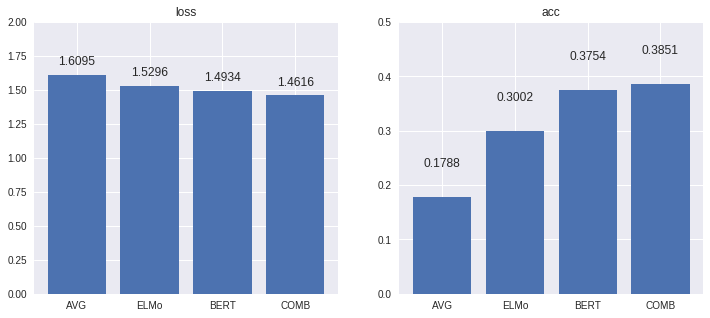

In [38]:
cols = ['AVG', 'ELMo', 'BERT', 'COMB']
loss = [semb_res[0], elmo_res[0], bert_res[0], comb_res[0]]
acc = [semb_res[1], elmo_res[1], bert_res[1], comb_res[1]]
_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(cols, loss)
for a, b in zip(cols, loss):
  axes[0].text(a, b+0.05, '%.4f' % b, ha='center', va='bottom')
axes[0].set_ylim([0, 2])
axes[0].set_title('loss')
axes[1].bar(cols, acc)
for a, b in zip(cols, acc):
  axes[1].text(a, b+0.05, '%.4f' % b, ha='center', va='bottom')
axes[1].set_ylim([0, 0.5])
axes[1].set_title('acc')